In [1]:
# Parameters
MSA_MARKET = "Miami"
BRAND_MSA = "Miami-Ft. Lauderdale, FL"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3ZCCI1VqFhRVTraIqCdujfHdsAjsVNfh9B%2FPwNF6jS10t6s63Ps795jX17t6yrYSQvK6CGKI4ICqbkRSq%2BH6Gl1E16gABzTglVGyyF6k4CuRpfA6qqh49Zt9EK%2BthJc4A%2FSQI8bQ9RaTQ0DBVSzWgJ1nC7H9zOaRIQ21jjDTYU%2BWL52MABpnSc8WwQoj7dxrqEYd10Xdb3I2DVOCCGY5NirDpJvZ%2F3e9%2FSJPsYkPei9wsvn72zflT6N4Cus4iQCertazcP543KFgvEZ9dpoaGtpl9LuFJdPi9kJADzB7xZcZ%2BwWwpopHYE2XVmxreSmblrnj4z8CpdS4Mqsle96OhmiZqvEphF38eRHfsEW%2BfPDUwl36%2F1udgt7%2BDntyZfX3aNevCw2W9MYjoLnc6zJIdYpQCun%2BhCm8yWSpGEch0myIoT2CU3zKE7TXyiY%2BDCVZu7o%2FIc44pVphae1knEuAY6oXOiQrxU%2BlTCAwYdUsRikBSdZwVmfFWWWZYMBizMWxzJLen05ICVhfNAviUyzhHMhWT4o%2BgUv%2BpwVed5Dp5dGj%2

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,Include,MRA,None,None,None,None,None,None,None,None
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,Include,MRA,None,None,None,None,None,None,None,None
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,Include,Self Service,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9sgFMW%2FisWebbAT2wtKUqVJu0Zr1yh%2FNrVvGLBDakPGxXX77UeSRuo0tdLe0OUc%2BN17YHjx0tTBs7SgjB6hOCIokJoboXQ1Qpv1dfgVBeCYFqw2Wo7QqwR0MR4Ca%2Bo9nbRuq5fydyvBBf4gDfS4MUKt1dQwUEA1ayRQx%2BlqcndLk4jQvTXOcFOjd5bPHQxAWucJzxYByuNtndtTjLuui7peZGyFE0IIJgPsVQfJl7P%2Bxff0gT7GpH%2FQe4WXL97YLpU%2BjeAzrOIkAnqzXi%2FCxf1qjYLJGXVqNLSNtCtpnxWXm%2BXtCQA8wa4F1xn7BGHDlI5Am66s2ZPkptm3zh8Z%2BRUupcC1qZTvej4bof2TEpfphsGv%2FsNq9U09Dp5v7iZOfK%2Bukk49lC%2B77Y5P72G5qa4m1Zyj4Oc51uQQ6xyglXN9CNP5Ekn6YRyHSbImhKYx7fWiQd5%2FRMHMh6k0c0fnP8QRr00rPK2VjHMJcETlQoe8UvhUwgAGH1LFIu8XnGQFZykryizL8pzFGYtjmSW9VOakJIznaUlkP0s4F5IN8iIteJFyVgwGPXR6afTIbsf%2

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26818
42491
25757
loss is 0.03956298008800063


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,0066S00000zLgI2QAK,0016S000030r6NFQAY,0016S000030r6NFQAY,Dover,DE,Canada,19901,20223,2022-02-21,3,...,None,None,None,None,19901,Delaware,DE,"Dover, DE MSA",20100.0,Philly Metro
1,006PJ0000086jacYAA,001PJ000008J43LYAS,001PJ000008J43LYAS,None,NC,US,27409,20244,2024-03-18,4,...,None,None,None,None,27409,North Carolina,NC,"Greensboro-High Point, NC MSA",24660.0,Rest of Country
2,0066S000012cDzIQAU,0016S000038078WQAQ,0016S000038078WQAQ,St. Louis,MO,None,63112,20231,2022-06-13,1,...,None,None,None,None,63112,Missouri,MO,"St. Louis, MO-IL MSA",41180.0,Rest of Country
3,0066S00000zIvpMQAS,0016S000030oBqaQAE,0016S000030oBqaQAE,New York,New York,United States,10001,20222,2021-11-22,2,...,None,None,None,None,10001,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
4,006PJ000004SKeZYAW,001PJ000004X7iJYAS,001PJ000004X7iJYAS,Palm Desert,CA,None,92260,20243,2023-12-04,3,...,None,None,None,None,92260,California,CA,"Riverside-San Bernardino-Ontario, CA MSA",40140.0,Rest of South California


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2022-02-24
1       2024-03-21
2       2022-06-15
3       2021-11-24
4       2023-12-06
           ...    
25752   2023-07-06
25753   2023-07-07
25754   2022-07-22
25755   2024-06-17
25756   2023-09-05
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2022-02-24
1       2024-03-21
2       2022-06-15
3       2021-11-24
4       2023-12-06
           ...    
25752   2023-07-06
25753   2023-07-07
25754   2022-07-22
25755   2024-06-17
25756   2023-09-05
Name: IO_DATE, Length: 25757, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is Florida
2024-08-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
30,2021-06,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",23
156,2021-07,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",19
290,2021-08,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",20
405,2021-09,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",18
527,2021-10,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",22


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
30,2021-06-01,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",23
156,2021-07-01,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",19
290,2021-08-01,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",20
405,2021-09-01,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",18
527,2021-10-01,Florida,FL,"Miami-Fort Lauderdale-Pompano Beach, FL MSA",22


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-08-01
2024-11-01


,year_month,io_count
30,2021-06-01,23
156,2021-07-01,19
290,2021-08-01,20
405,2021-09-01,18
527,2021-10-01,22


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_5251/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,23
2021-07-01,19
2021-08-01,20
2021-09-01,18
2021-10-01,22


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
30,2021-06-01,23,False,0,6
156,2021-07-01,19,False,1,7
290,2021-08-01,20,False,2,8
405,2021-09-01,18,False,3,9
527,2021-10-01,22,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,23,False,0,6
2021-07-01,19,False,1,7
2021-08-01,20,False,2,8
2021-09-01,18,False,3,9
2021-10-01,22,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,26,False,36,6
2024-07-01,28,False,37,7
2024-08-01,31,True,38,8
2024-09-01,24,True,39,9
2024-10-01,17,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,23,False,0,6
2021-07-01,19,False,1,7
2021-08-01,20,False,2,8
2021-09-01,18,False,3,9
2021-10-01,22,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,26,False,36,6
2024-07-01,28,False,37,7
2024-08-01,31,True,38,8
2024-09-01,24,True,39,9
2024-10-01,17,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J3YCCcUCKlbKhkopg3STeHMch3okNvN1SNmnn8MfqdPUSnuLbs7179x77MHta1V6B2FAajVEYUCQJxTXuVTbIXpOp%2F4N8sAylbNSKzFERwHodjQAVpV7Oq7ti1qJX7UA67mDFND2xxDVRlHNQAJVrBJALafr8eOcRgGhDEAY63Do0pKDdKwXa%2FcU46ZpgqYTaLPFESEEkz52qlbyCb1B7D9m7I22muvy2vLqZnoHEWLSbRFO4QjLS%2BNnqc4r%2BIiSnUVAv6bp0l8%2BrVPkja%2FT3WkFdSXMWpiD5OJ5NT8bAOfgZw220WYHfsWkCkDppijZTnBd7WvrjgzcFy5Ejku9lW5Rs8kQ7Xcyhx8PGztni%2FHicG%2FTzrEob6adw%2FIhC3%2BTp5WpbpL7Yr09ZJsv3zjyvl9jjdpYZwC1mKk2TOtKJOr6YehHUUoIjUPaJUFCwg3yJi5MqZg9df7jOOClrnPn1gjGuQA4WeW58vlW4nMJA2jcpoTzXjfjJMk4i1lWJEnS67EwYWEokqgTix4pCOO9uCCim0Sc54L1e1mc8SzmLOv3O%2Bh80%2BjJuxn91

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1623,Miami,Florida,United States,Direct,2022-03-01,274
4029,Miami,Florida,United States,Direct,2022-04-01,251
6189,Miami,Florida,United States,Direct,2022-05-01,165
9521,Miami,Florida,United States,Direct,2022-06-01,233
16455,Miami,Florida,United States,Direct,2022-07-01,3972


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

Miami
Florida
Miami-Ft. Lauderdale, FL
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9owFIb%2FSuRdJ3ZCPooFVHyoG1pHaaHTtDvHdqhLYgfbaUp%2F%2FRwCUqeplXYXnbzHz3vOa4%2BuX6vSe%2BHaCCXHIAwQ8Likigm5G4PH7Y1%2FBTxjiWSkVJKPwZEbcD0ZGVKVNZ429kk%2B8EPDjfXcQdLg7scYNFpiRYwwWJKKG2wp3kx%2F3OIoQJgYw7V1OHBuYUY41pO1NYawbdugHQRK72CEEIJoCJ2qk3wB7xD154xaK6uoKi8tr26mDxAhRHGHcApHWJ8bZ0L2K%2FiMkvcig79tt2t%2FfbfZAm96mW6upGkqrjdcvwjKHx9uewPGOXhujG2V3hu%2FIkIGRqq2KMmeU1XVjXVHBu4LFpzBUu2EW9RyMQb1XjB5OB5mdZG%2FsZUMyTGR%2Bvhrnobxqsin0eA%2Bv5sdyFv09Tn9fk%2BB9%2FMSa9TFujSm4UvZhWldCUWxH4Z%2BFG0RwkmI46tgmF39Bt7ChSkksafOfxwHtFQNc241J5RyY05WKZM%2B3QnYl6AxCnYpQZbFOUVpTklC8iJN0ywjYUrC

/Users/lmola/Documents/Luis_Projects/OOH/prod/testing/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
91,Florida,Florida,"Miami-Ft. Lauderdale, FL",676.14,968,246,2022-01-01
369,Florida,Florida,"Miami-Ft. Lauderdale, FL",633.34,591,239,2023-05-01
411,Florida,Florida,"Miami-Ft. Lauderdale, FL",1197.77,543,219,2023-06-01
466,Florida,Florida,"Miami-Ft. Lauderdale, FL",816.46,765,226,2023-09-01
764,Florida,Florida,"Miami-Ft. Lauderdale, FL",630.27,657,181,2022-12-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,23,False,0,6
2021-07-01,19,False,1,7
2021-08-01,20,False,2,8
2021-09-01,18,False,3,9
2021-10-01,22,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,23,False,0,6
1,2021-07-01,19,False,1,7
2,2021-08-01,20,False,2,8
3,2021-09-01,18,False,3,9
4,2021-10-01,22,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,15,False,9,3,Miami,Florida,United States,2022-03-01,274
1,2022-04-01,33,False,10,4,Miami,Florida,United States,2022-04-01,251
2,2022-05-01,16,False,11,5,Miami,Florida,United States,2022-05-01,165
3,2022-06-01,23,False,12,6,Miami,Florida,United States,2022-06-01,233
4,2022-07-01,17,False,13,7,Miami,Florida,United States,2022-07-01,3972


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,15,False,9,3,Miami,Florida,United States,2022-03-01,274,Florida,Florida,"Miami-Ft. Lauderdale, FL",874.25,680,184,2022-03-01
1,2022-04-01,33,False,10,4,Miami,Florida,United States,2022-04-01,251,Florida,Florida,"Miami-Ft. Lauderdale, FL",817.89,739,203,2022-04-01
2,2022-05-01,16,False,11,5,Miami,Florida,United States,2022-05-01,165,Florida,Florida,"Miami-Ft. Lauderdale, FL",396.61,624,183,2022-05-01
3,2022-06-01,23,False,12,6,Miami,Florida,United States,2022-06-01,233,Florida,Florida,"Miami-Ft. Lauderdale, FL",687.74,631,180,2022-06-01
4,2022-07-01,17,False,13,7,Miami,Florida,United States,2022-07-01,3972,Florida,Florida,"Miami-Ft. Lauderdale, FL",643.67,559,162,2022-07-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,15,False,9,3,274,874.25,680,184
2022-04-01,33,False,10,4,251,817.89,739,203
2022-05-01,16,False,11,5,165,396.61,624,183
2022-06-01,23,False,12,6,233,687.74,631,180
2022-07-01,17,False,13,7,3972,643.67,559,162


In [33]:
df_final2['direct_search_sum'].describe()

count       32.000000
mean      9166.156250
std       4649.331371
min        165.000000
25%       7552.500000
50%       8816.500000
75%      13674.500000
max      15632.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,15,False,9,3,274,874.25,680,184
2022-04-01,33,False,10,4,251,817.89,739,203
2022-05-01,16,False,11,5,165,396.61,624,183
2022-06-01,23,False,12,6,233,687.74,631,180
2022-07-01,17,False,13,7,3972,643.67,559,162


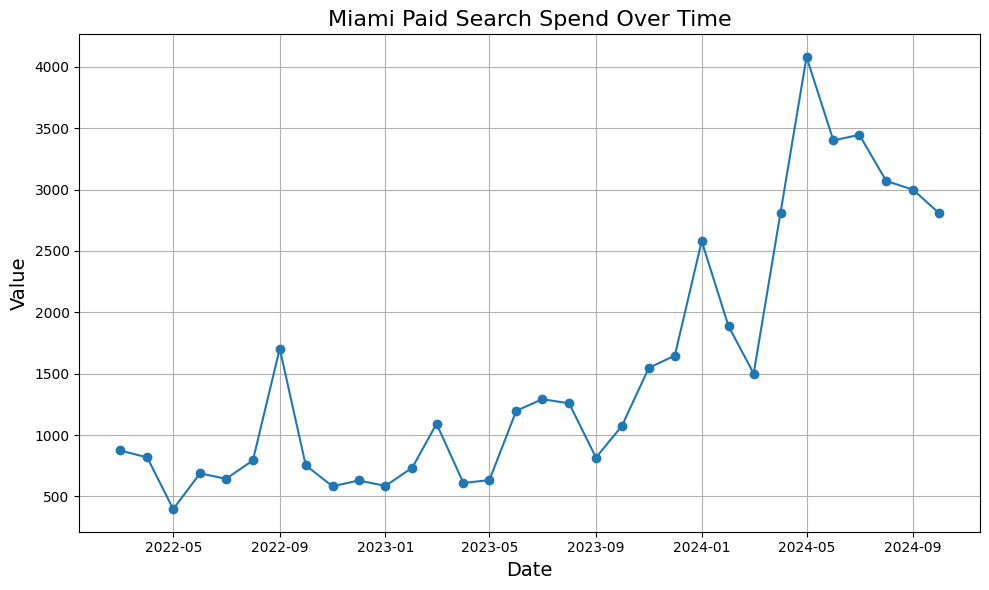

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

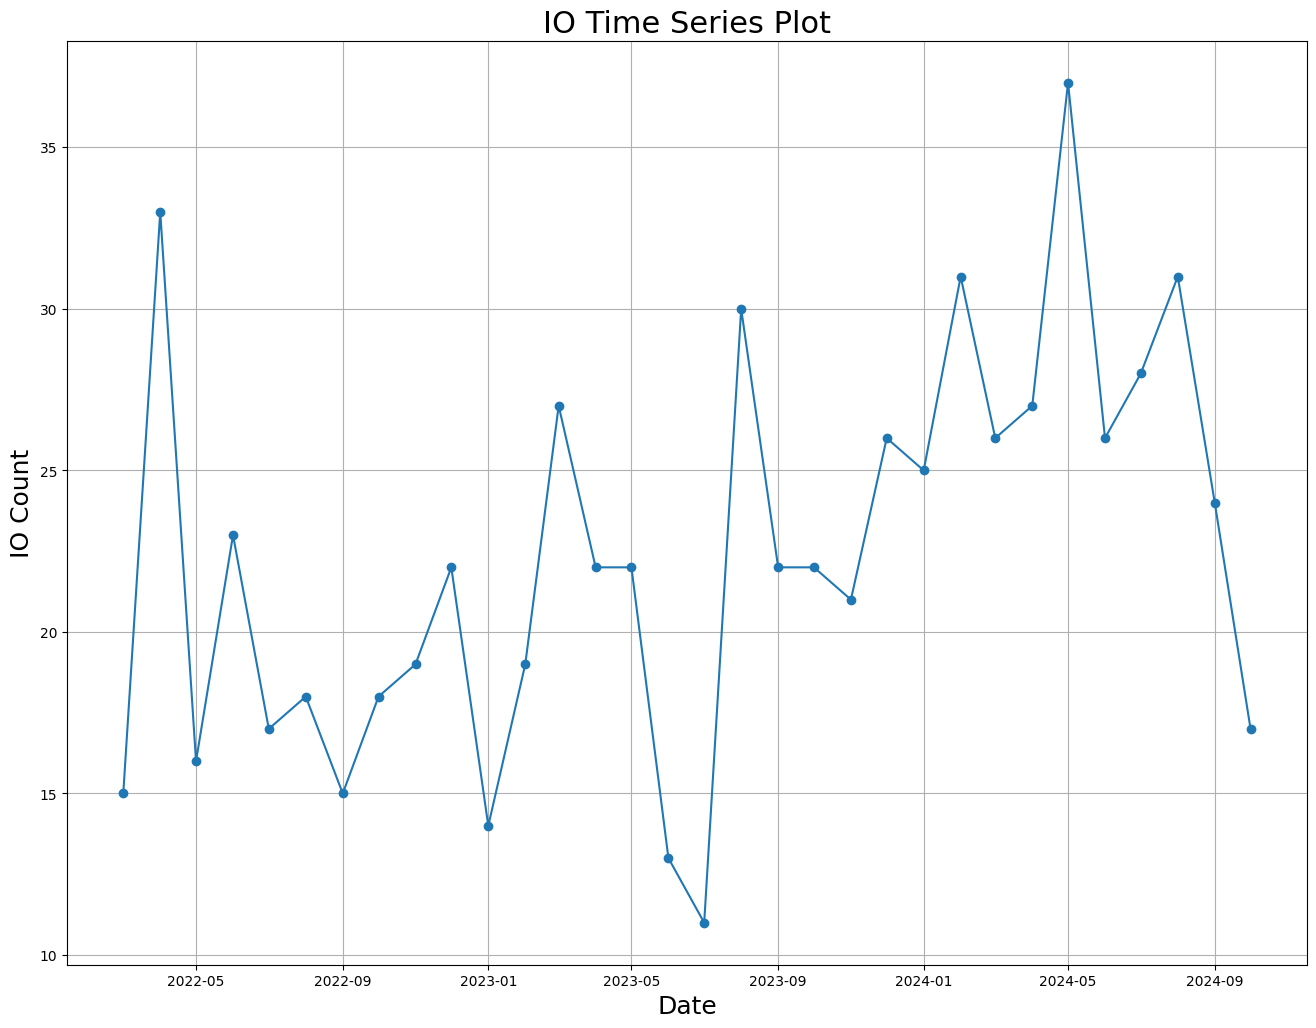

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.382067218910154
p-value: 0.0003192916039714216


<Figure size 1000x600 with 0 Axes>

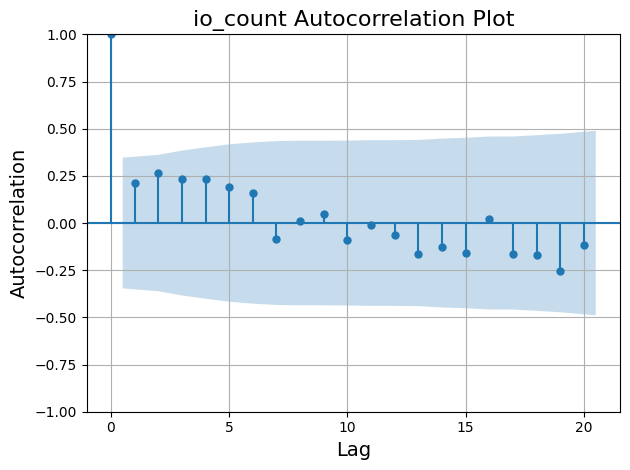

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

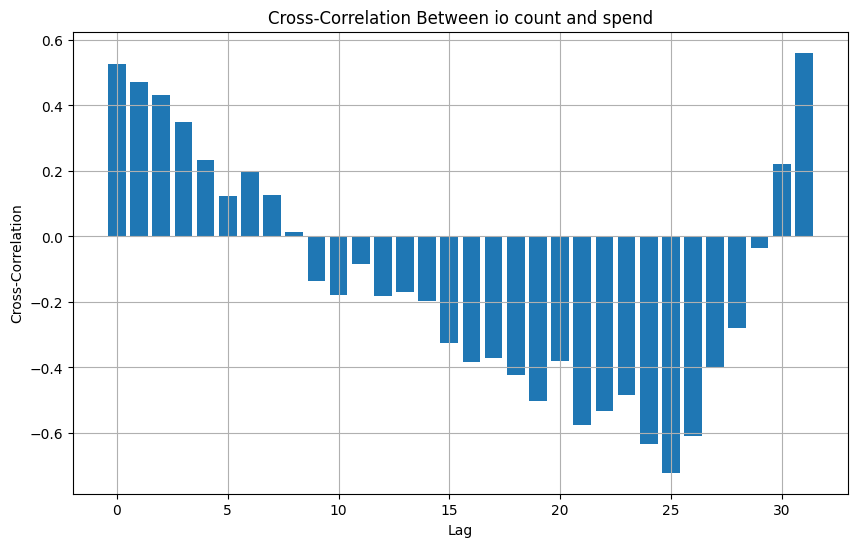

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,15,False,9,3,274,874.25,680,184
2022-04-01,33,False,10,4,251,817.89,739,203
2022-05-01,16,False,11,5,165,396.61,624,183
2022-06-01,23,False,12,6,233,687.74,631,180
2022-07-01,17,False,13,7,3972,643.67,559,162


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,33,False,10,4,251,817.89,739,203,874.25,274.0,680.0,15.0
2022-05-01,16,False,11,5,165,396.61,624,183,817.89,251.0,739.0,33.0
2022-06-01,23,False,12,6,233,687.74,631,180,396.61,165.0,624.0,16.0
2022-07-01,17,False,13,7,3972,643.67,559,162,687.74,233.0,631.0,23.0
2022-08-01,18,False,14,8,6077,793.38,643,168,643.67,3972.0,559.0,17.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,26,False,36,6,13432,3400.80,596,246,4081.12,15632.0,692.0,37.0
2024-07-01,28,False,37,7,14694,3446.24,563,257,3400.80,13432.0,596.0,26.0
2024-08-01,31,True,38,8,13736,3070.66,554,256,3446.24,14694.0,563.0,28.0
2024-09-01,24,True,39,9,15235,2998.80,652,305,3070.66,13736.0,554.0,31.0
2024-10-01,17,True,40,10,15245,2808.52,591,246,2998.80,15235.0,652.0,24.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + SPEND +  \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


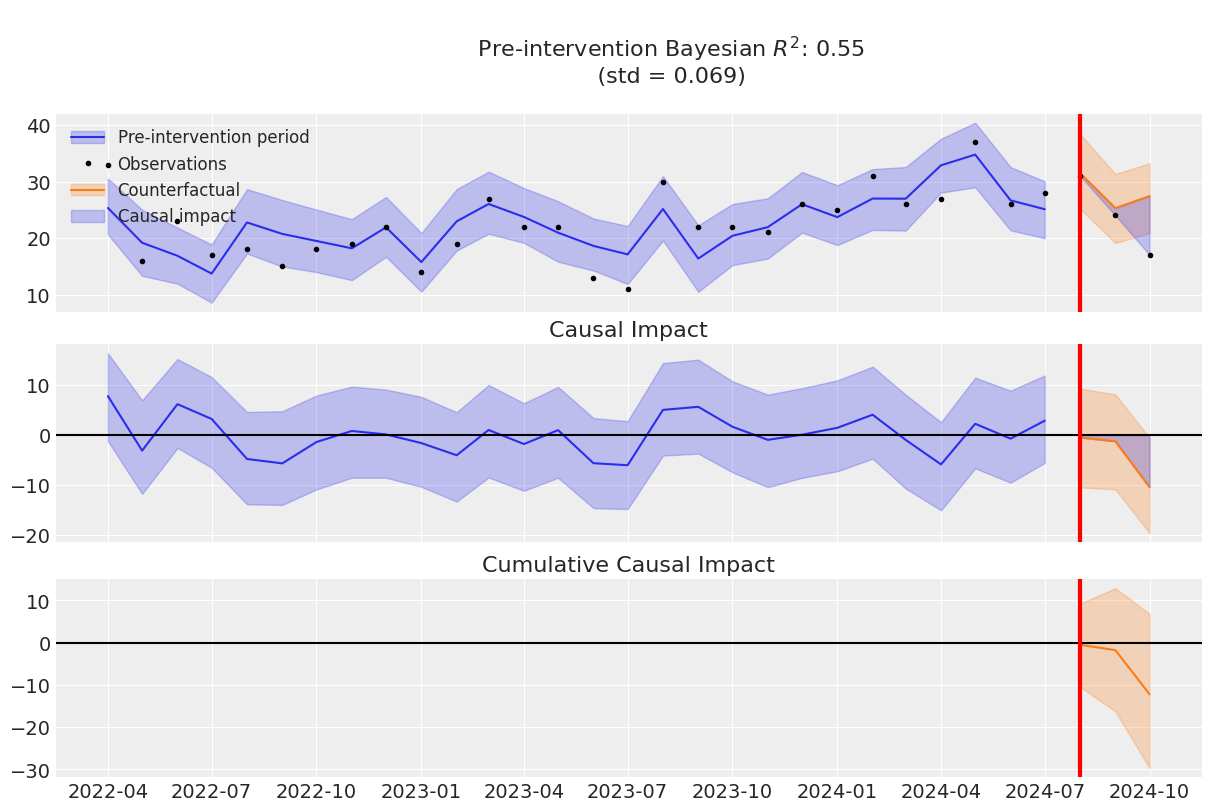

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for Miami saved as Miami_plot.png


(0.0, 1.0, 0.0, 1.0)

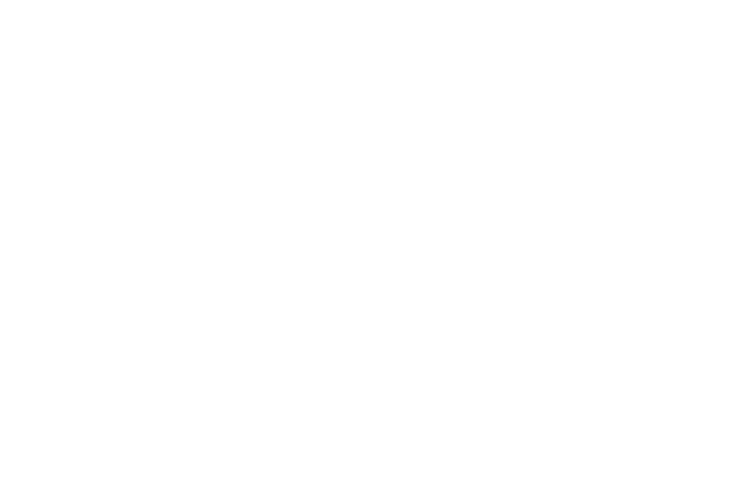

In [46]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[26.0964547 , 15.16720421, 16.85621607, ..., 30.59806486,
         27.32229751, 22.89798411],
        [21.34114062, 12.2891463 , 14.70301243, ..., 30.72998878,
         34.19489635, 22.84108681],
        [23.76753462, 25.44713239, 22.58307637, ..., 32.82356469,
         22.56594158, 25.6028831 ],
        ...,
        [24.44282444, 21.22751069, 23.73118582, ..., 42.80361097,
         33.33886472, 27.94848461],
        [27.72510574, 15.61514535, 12.29206834, ..., 25.8038154 ,
         20.95296798, 19.80057337],
        [31.14396621, 16.95903698,  9.47996473, ..., 37.01485472,
         28.34614747, 29.65037407]],

       [[31.10185453, 17.67873478, 21.35437603, ..., 38.62870567,
         27.70927629, 27.08153882],
        [15.55800947, 11.27907005, 19.09518283, ..., 32.60730496,
         30.86426941, 25.66172505],
        [21.78842793, 18.85417165, 20.67569393, ..., 35.36903199,
         28.11030389, 29.617

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[24.92677804, 19.1010261 , 16.6457228 , 13.8966297 , 22.71621256,
        20.46595964, 19.21155009, 17.94529873, 21.98114953, 15.62438362,
        22.91028387, 25.9530896 , 23.71217118, 21.13172582, 18.56090746,
        17.05750336, 25.08963143, 16.2994308 , 20.0161477 , 22.03776228,
        25.89486172, 23.57495467, 26.8809857 , 26.93454856, 33.04393316,
        34.65881381, 26.6571259 , 25.00742257],
       [25.44180306, 19.11332697, 16.82462386, 13.64579319, 22.79269796,
        20.89354383, 19.43951507, 18.37613964, 21.80727293, 15.69747808,
        23.16197923, 26.23912781, 23.90880838, 21.19245838, 18.74794265,
        17.11074985, 25.16221396, 16.26231719, 20.47104164, 22.12432264,
        25.95644984, 23.58619166, 27.00491106, 27.0511629 , 32.76346721,
        34.91741244, 26.7200144 , 25.30026294],
       [25.31822437, 19.04784178, 16.92281033, 13.83907533, 22.94373288,
        20.61853557, 19.4045955 , 18.25093964, 21.95880402, 15.78635048,
        22.86841312, 25.90208986, 23.64071367, 20.95824953, 18.71789063,
        17.11300059, 24.73701655, 16.50089866, 20.49958714, 21.88486685,
        26.06940476, 23.80945834, 26.80501452, 26.87439937, 32.82129938,
        34.63829693, 26.70695564, 25.24141643],
       [25.29349402, 19.25066412, 16.99330416, 13.82765322, 22.71899262,
        20.73572185, 19.56289619, 18.23615168, 21.8104046 , 15.37813209,
        23.2631077 , 25.91701528, 23.9857851 , 20.86651508, 18.51182565,
        16.89141478, 24.97140088, 16.4525313 , 20.46346011, 21.8556317 ,
        25.89348694, 23.3164191 , 27.13572696, 27.0837254 , 32.88278034,
        34.84815337, 26.88401025, 25.04073951]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,22.496,1.038,20.566,24.527,0.017,0.012,3735.0,3384.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,1.93,4.33,-6.182,9.94,0.072,0.051,3599.0,3741.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-12.22,9.84,-27.53,4.108,0.16,0.117,3783.0,3717.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,26,False,36,6,13432,3400.80,596,246
28,2024-07-01,28,False,37,7,14694,3446.24,563,257
29,2024-08-01,31,True,38,8,13736,3070.66,554,256
30,2024-09-01,24,True,39,9,15235,2998.80,652,305
31,2024-10-01,17,True,40,10,15245,2808.52,591,246


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,31,Miami,0
1,2024-09-01,24,Miami,1
2,2024-10-01,17,Miami,2


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_5251/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-08-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-08-01,Miami,31,31.511,-0.511,5.296,-0.0162,False,-8.576,8.936,0.087,0.063
1,1,2024-09-01,Miami,24,25.274,-1.274,5.007,-0.0504,False,-9.552,7.067,0.077,0.059
2,2,2024-10-01,Miami,17,27.435,-10.435,5.018,-0.3804,False,-18.620,-2.286,0.077,0.054


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,31,Miami,0
1,2024-09-01,24,Miami,1
2,2024-10-01,17,Miami,2


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-08-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,72.0


In [64]:
int_dates['io_count'].sum()

72

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,-12.22,9.84,-27.53,4.108,0.16,0.117,3783.0,3717.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,Miami,2024-08-01,2024-10-01,72,84.22,-12.22,9.84,-0.1451,False,-27.53,4.108,0.16,0.117


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)